# Advanced Classification Day 4 - Exercises

## Exercise 1

#### Question 1 
##### Load libraries that are used in this module.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
import datetime as dt

# up, up, down, down, left, right, left, right, a, b
import konami

warnings.simplefilter(action='ignore', category=FutureWarning)



#### Question 2
##### Set `main_dir` to the location of your `af-werx` folder.
##### Make `data_dir`  from the `main_dir` and concatenate remainder of the path to data directory.


In [2]:
nb_root = globals()['_dh']
os.chdir(nb_root[0])
 
main_dir = os.path.abspath(os.path.join ("..",))

# Make `data_dir` and 'path_dir' from the `main_dir` and
data_dir = os.path.join(main_dir, "data")
plot_dir = os.path.join(main_dir, "plot")

#### Question 3
##### Set the working directory to `data_dir`.
##### Check if the working directory is updated to `data_dir`.


In [3]:
# Set working directory.
os.chdir(data_dir)
# Check working directory.
print(os.getcwd())

/Users/datasociety/Desktop/af-werx/data


#### Question 4
##### Load `communities-and-crimes.csv` and save as `ex_data`.

##### This is a dataset that predicts the violent crime rates per population(`ViolentCrimesPerPop`) using the rest of the variables as predictors. 
##### More information on the data can be found here. (http://archive.ics.uci.edu/ml/datasets/communities+and+crime)
##### Check the shape of `ex_data`.
##### Check for NAs in the dataframe.

In [4]:
ex_data = pd.read_csv('communities-and-crimes.csv')
ex_data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [5]:
ex_data.shape

(1994, 123)

In [6]:
ex_data.isnull().sum()

population                 0
householdsize              0
racepctblack               0
racePctWhite               0
racePctAsian               0
racePctHisp                0
agePct12t21                0
agePct12t29                0
agePct16t24                0
agePct65up                 0
numbUrban                  0
pctUrban                   0
medIncome                  0
pctWWage                   0
pctWFarmSelf               0
pctWInvInc                 0
pctWSocSec                 0
pctWPubAsst                0
pctWRetire                 0
medFamInc                  0
perCapInc                  0
whitePerCap                0
blackPerCap                0
indianPerCap               0
AsianPerCap                0
OtherPerCap                1
HispPerCap                 0
NumUnderPov                0
PctPopUnderPov             0
PctLess9thGrade            0
                        ... 
PctSameHouse85             0
PctSameCity85              0
PctSameState85             0
LemasSwornFT  

#### Question 5

##### We can see that our target variable, `ViolentCrimesPerPop` is currently a numerical variable. 
##### In order to transform the target variable into a categorical variable, let's firstly see the summary of this column to get the value of the median.
##### Create a new column called `ViolentCrimesPerPop_cat`, where any values of `ViolentCrimesPerPop` higher than the median is `1`, and lower is `0`. 
##### Drop the original `ViolentCrimesPerPop` column and see the `value_counts` of `ViolentCrimesPerPop_cat` column.

#### Hint:

```
df[col_name].describe()  #<- To find median
df['new_colname'] = np.where(df['old_colname'] > median_value, 1,0)  #<- To form new column
```

In [7]:
ex_data['ViolentCrimesPerPop'].describe()

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64

In [8]:
ex_data['ViolentCrimesPerPop_cat'] = np.where(ex_data['ViolentCrimesPerPop'] > ex_data['ViolentCrimesPerPop'].median(), 1,0) 

In [9]:
ex_data = ex_data.drop(columns = 'ViolentCrimesPerPop')

In [10]:
ex_data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop_cat
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,1
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,1
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,1
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0


In [11]:
ex_data['ViolentCrimesPerPop_cat'].value_counts()

0    1001
1     993
Name: ViolentCrimesPerPop_cat, dtype: int64

#### Question 6

##### Since there are NAs in some columns, let's try dropping rows that has NA in one of those columns and see how the dataset looks like. 

##### Drop all the rows where there are NAs in a column named `LemasSwornFT`. 
##### Name the dropped dataset as `ex_data_dropped`. 
##### Check the NAs for `ex_data_dropped`. 
##### *Hint: Since there are too many columns, use the following function to see if there are any columns with NAs in `ex_data_dropped`. 


In [12]:
ex_data_dropped = ex_data.dropna(subset=['LemasSwornFT'])

In [13]:
print(ex_data_dropped.columns[ex_data_dropped.isna().any()])

Index([], dtype='object')


```print(ex_data_dropped.columns[ex_data_dropped.isna().any()])```

#### Question 7

##### Create our target as `y_1` using `ViolentCrimesPerPop_cat`  and the predictors as `X_1` using the rest of the variables from `ex_data_dropped`.

In [14]:
x = ex_data_dropped.drop(['ViolentCrimesPerPop_cat'], axis = 1)
y = ex_data_dropped['ViolentCrimesPerPop_cat']

#### Question 8 

##### Using the following codes that defines a function to perform a logistic regression, save the accuracy score from `X_1` and `y_1` as `accuracy1`. 
##### We will use `accuracy1` as a comparison value for our upcoming models. 
##### Create a performance dataframe named `ex_performance_df` to save the accuracy values.

In [15]:
logreg = LogisticRegression()

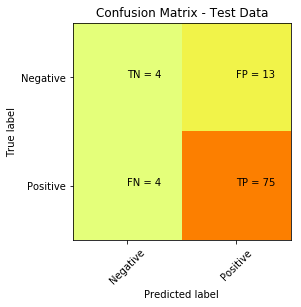

Accuracy for the model on test data:  0.8229166666666666


In [16]:
accuracy1, baseline_model = konami.quick_model(ex_data_dropped, 
                               'ViolentCrimesPerPop_cat', 
                               logreg, 
                               seed = 22)

In [17]:
accuracy1

0.8229166666666666

In [18]:

performance_df = pd.DataFrame(columns = ['dataset_name', 
                                         'model_name',
                                         'model_metric',
                                         'metric_value'])

s = pd.Series(['crime_rate', 
               'baseline_model', 
               'accuracy', 
               accuracy1],
              index = ['dataset_name', 
                       'model_name',
                       'model_metric',
                       'metric_value'])
performance_df = performance_df.append(s, ignore_index = True)
print(performance_df)


  dataset_name      model_name model_metric  metric_value
0   crime_rate  baseline_model     accuracy      0.822917


## Exercise 2

#### Question 1

##### Recall that we created a new dataframe called `ex_data_dropped` from `ex_data` by dropping all the rows that has NAs. 
##### Instead of dropping the rows with NAs, let's try imputing the missing values using the median value from `ex_data` for each column. 
##### Create a new dataframe names `ex_data_median` that is equal to `ex_data`. 
##### Fill the NAs with median in `ex_data_median` with median. Use the following function to do it. 
##### Check to make sure that there are no NAs in the dataframe anymore. 

In [19]:
def fillna_median(dataset):
    col_list = dataset.columns.tolist()
    for i in range(0, dataset.shape[1]):
        dataset.iloc[:,i].fillna(dataset.iloc[:,i].median(), inplace = True)

In [20]:
ex_data_median = ex_data

In [21]:
konami.fillna_median(ex_data_median)

In [22]:
print(ex_data_dropped.columns[ex_data_dropped.isna().any()])

Index([], dtype='object')


#### Question 2

##### Create the target as y_2 and the predictors as X_2 using ex_data_median.


In [23]:
print('see below')

see below


#### Question 3

##### Using `logistic_model` function, save the accuracy score from X_2 and y_2 as accuracy2.
##### Save `accuracy2` in `ex_performance_df`. 
##### Save `model_name` as `imputed-with-median`.
##### How did the accuracy score change from the base model?


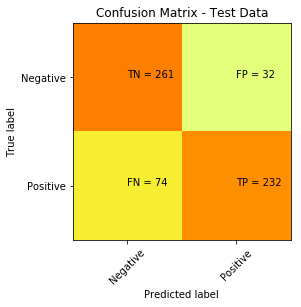

Accuracy for the model on test data:  0.8230383973288815


In [24]:
accuracy2, imputed_with_median = konami.quick_model(ex_data_median, 
                               'ViolentCrimesPerPop_cat', 
                               logreg, 
                               seed = 22)

In [25]:
s = pd.Series(['crime_rate', 
               'imputed_median_model', 
               'accuracy', 
               round(accuracy2, 4)],
              index = ['dataset_name', 
                       'model_name',
                       'model_metric',
                       'metric_value'])
performance_df = performance_df.append(s, ignore_index = True)
print(performance_df)

  dataset_name            model_name model_metric  metric_value
0   crime_rate        baseline_model     accuracy      0.822917
1   crime_rate  imputed_median_model     accuracy      0.823000


## Exercise 3

* In our class we added a lot of different variable by manipulating existing columns
* All datasets will not perform better by following the technique we did in class
* Try following the techniques we did in our class on crime dataset during workshop session and see how it performs on your own.
* For this exercise, we are going to run PCA to add new features instead of manipulating the existing columns

#### Question 1 

##### Let's see the correlation of all of the variables. 
##### Using the `ex_data_dropped` dataframe, create a heatmap that shows the correlations of all the variables. 
##### Make sure to import the `seaborn` package. 

##### What can you interpret from the outcome?


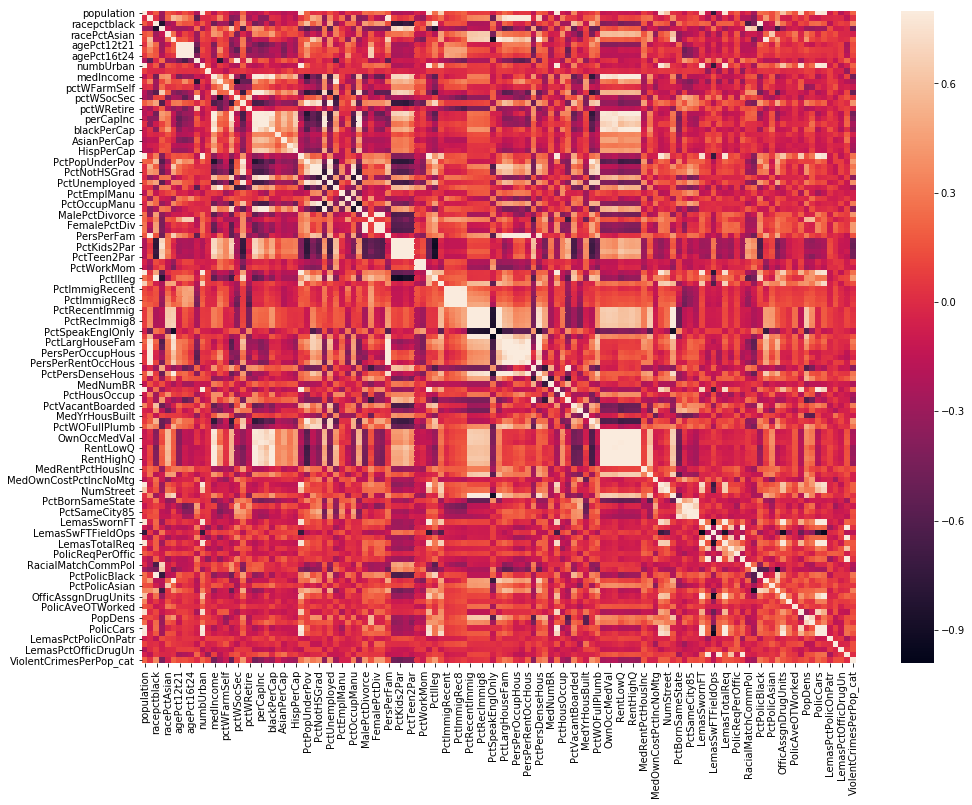

In [26]:
import seaborn as sns

ex_corrmat = ex_data_dropped.corr()
fig = plt.figure(figsize = (16, 12))

sns.heatmap(ex_corrmat, vmax = 0.8)
plt.show()

```
import seaborn as sns

corrmat = dataframe.corr()
fig = plt.figure(figsize = (16, 12))

sns.heatmap(corrmat, vmax = 0.8)
plt.show()
```

##### We can see that most of the variables are highly correlated. 

#### Question 2 

##### Since the variables seem to be highly correlated in general, let's try to reduce the dimensionality using the PCA method. 
##### Hopefully this will reduce multicolinearity in the model. 

##### Scale `X_1`, which are the predictors from the `ex_data_dropped` dataframe, and save as `X_1_scaled`. 
##### Make sure to import the `StandardScaler` using the following code.

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_scaled = sc.fit_transform(x)

#### Hint:
```
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
df_scaled =sc.fit_transform(dataframe)
```

#### Question3 

##### Run PCA on the scaled predictors `X_1_scaled` and name is `ex_pca`.
##### Calculate the cumulative percent variance explained and name it `cum_percent_var_explained`.


In [28]:
from sklearn.decomposition import PCA

pca=PCA()

ex_pca=pca.fit_transform(x_scaled)

cum_percent_var_explained = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(cum_percent_var_explained)

[21.38 37.71 47.6  54.98 61.2  65.43 68.99 72.01 74.8  76.74 78.52 79.91
 81.29 82.45 83.47 84.37 85.23 86.05 86.83 87.59 88.31 88.98 89.62 90.25
 90.84 91.39 91.89 92.35 92.79 93.21 93.61 94.   94.35 94.69 95.   95.28
 95.55 95.79 96.01 96.22 96.43 96.62 96.8  96.97 97.13 97.29 97.45 97.6
 97.74 97.87 98.   98.12 98.24 98.35 98.45 98.55 98.64 98.73 98.81 98.89
 98.96 99.02 99.08 99.14 99.19 99.24 99.29 99.34 99.38 99.42 99.46 99.5
 99.53 99.56 99.59 99.62 99.65 99.68 99.7  99.72 99.74 99.76 99.78 99.8
 99.82 99.83 99.84 99.85 99.86 99.87 99.88 99.89 99.9  99.91 99.92 99.93
 99.94 99.95 99.96 99.97 99.98 99.99 99.99 99.99 99.99 99.99 99.99 99.99
 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99
 99.99 99.99]


```
from sklearn.decomposition import PCA
pca=PCA()
ex_pca=pca.fit_transform(dataframe_scaled)
cum_percent_var_explained = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(cum_percent_var_explained)
```

#### Question 4
##### Choose the dimensions to retain so that the PCA could explain around 90% of the variance which is 22 components
##### Using `fit_transform()` function transform `X_1_scaled` into PCs and save as `X_1_pca`. 
##### Convert `X_1_pca` as a DataFrame and save as `x_3`.

In [29]:
pca_24 = PCA(n_components = 24) 

X_1_pca=pca_24.fit_transform(x_scaled)
cum_percent_var_explained_24 = np.cumsum(np.round(pca_24.explained_variance_ratio_, decimals=4)*100)
print(cum_percent_var_explained_24)
x_3 = pd.DataFrame(X_1_pca)

[21.38 37.71 47.6  54.98 61.2  65.43 68.99 72.01 74.8  76.74 78.52 79.91
 81.29 82.45 83.47 84.37 85.23 86.05 86.83 87.59 88.31 88.98 89.62 90.25]


```
pca_n = PCA(n_components = n)  
X_1_pca=pca_n.fit_transform(dataframe_scaled)
cum_percent_var_explained_22 = np.cumsum(np.round(pca_22.explained_variance_ratio_, decimals=4)*100)
print(cum_percent_var_explained_22)
x_3=pd.DataFrame(X_1_pca)
```

#### Question 5

##### Run logistic regression using `x_3` and `y_1`.
##### Save the accuracy score as `accuracy3`.


In [30]:
accuracy3 = konami.logistic_model(x_3,y)

#### Question 6

##### Save `accuracy3` in `ex_performance_df`. 
##### Interpret the results. 


In [31]:
s = pd.Series(['crime_rate', 
               'PCA_model', 
               'accuracy', 
               round(accuracy3, 4)],
              index = ['dataset_name', 
                       'model_name',
                       'model_metric',
                       'metric_value'])
performance_df = performance_df.append(s, ignore_index = True)
print(performance_df)

  dataset_name            model_name model_metric  metric_value
0   crime_rate        baseline_model     accuracy      0.822917
1   crime_rate  imputed_median_model     accuracy      0.823000
2   crime_rate             PCA_model     accuracy      0.854200


In [32]:
pca_24.components_.shape

(24, 122)

In [33]:
ex_data_dropped.shape

(319, 123)

In [34]:
PCA_DF = pd.DataFrame(pca_24.components_, columns = x.columns)

In [35]:
PCA_DF

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,-0.076206,-0.045178,-0.126066,0.134775,0.051752,-0.050999,-0.081371,-0.060613,-0.053931,0.015412,...,-0.011074,-0.040736,-0.046952,-0.036798,-0.079172,-0.070854,0.024308,-0.004402,-0.016908,0.002326
1,0.052069,0.116538,-0.037003,-0.064450,0.149312,0.160858,0.010541,0.059146,0.025554,-0.096795,...,0.061623,-0.000919,0.133309,0.082937,0.019706,0.067440,0.015416,0.011789,-0.012921,0.012332
2,0.180485,-0.161188,0.054478,-0.025701,0.024755,-0.092746,-0.061160,-0.000214,0.010775,0.017537,...,-0.000222,0.137794,0.004661,0.089969,0.196272,0.190971,-0.020946,0.029448,-0.030446,0.081654
3,-0.072921,-0.092216,0.026500,-0.007692,-0.031736,-0.000616,-0.171193,-0.181063,-0.146891,0.233518,...,0.018529,-0.138335,0.143767,0.148048,-0.027731,0.020785,-0.012362,-0.089376,-0.001927,0.159741
4,0.175937,0.085692,-0.085003,0.058425,-0.001073,0.054739,-0.096026,-0.159149,-0.181351,0.007213,...,0.022230,0.176379,-0.065104,-0.055838,0.145099,0.157913,-0.003574,0.000009,-0.079915,-0.031345
5,-0.048026,-0.074084,-0.131702,0.100931,-0.007481,0.121726,-0.116365,-0.093912,-0.103716,0.087388,...,0.020951,-0.015211,-0.051523,-0.169489,0.042723,-0.005170,0.008707,0.096919,0.115648,0.154571
6,-0.072600,0.149282,0.207165,-0.189713,-0.043307,-0.011731,0.028123,-0.053649,-0.057702,-0.106056,...,-0.063095,-0.002343,-0.130145,-0.062613,0.023921,-0.023255,-0.128813,0.051229,0.026967,0.194625
7,-0.017169,0.100490,-0.125214,0.148099,-0.112848,0.043983,0.192329,0.178864,0.214728,-0.035109,...,-0.062416,-0.016629,0.019101,0.021105,0.076326,0.092749,-0.042412,-0.125326,0.005551,0.196879
8,-0.007063,0.000530,-0.054334,0.021890,0.008227,0.091010,0.126330,-0.013645,0.080318,0.114258,...,0.049654,0.025773,-0.117315,-0.058569,-0.017075,-0.055873,0.019744,0.052736,-0.026216,-0.081384
9,0.001215,0.049406,-0.018360,-0.014266,0.214091,-0.131042,0.040677,-0.053346,0.023478,0.124695,...,0.166370,-0.065835,-0.066854,-0.113945,0.001231,0.054606,-0.082457,0.138366,0.085792,0.106136


In [36]:
PCA_DF_T = PCA_DF.T

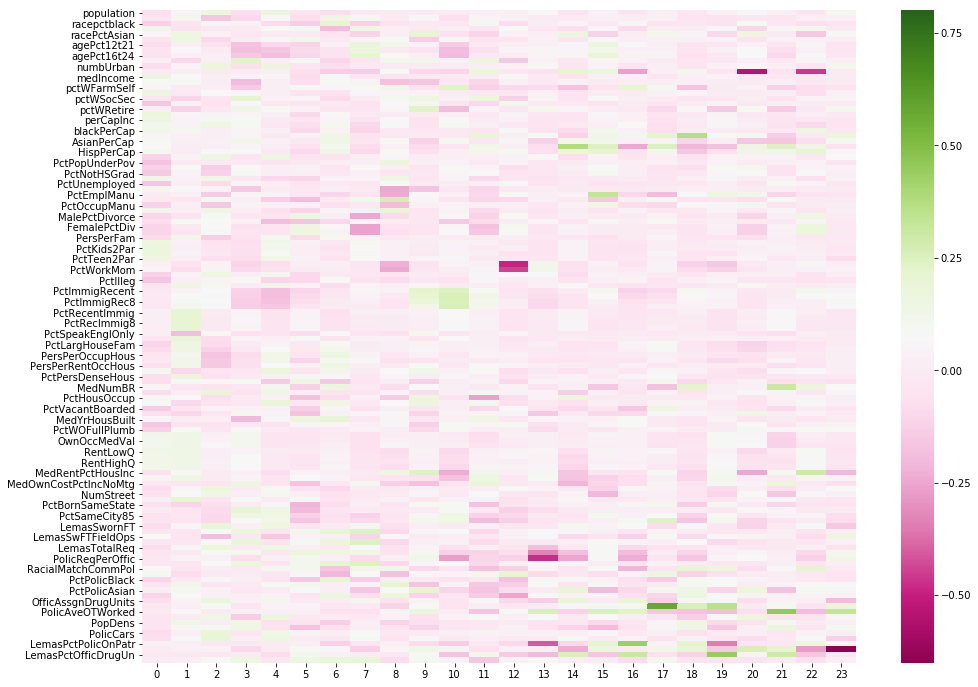

In [37]:
PCA_DF_Corr = PCA_DF.corr()
fig = plt.figure(figsize = (16, 12))

sns.heatmap(PCA_DF_T, cmap = 'PiYG', vmax = 0.8)
plt.show()

## Exercise 4

#### Question 1 

##### In this exercise, we will be importing a new dataset called `invoice-payment.csv` as `ex_data2`. 
##### This dataset predicts `invoice_risk_decision` using the rest of the variables as predictors.
##### Take a look at the first few rows of the dataset. 


In [38]:
ex_data2 = pd.read_csv('invoice-payment.csv')
ex_data2.head()

,invoice_risk_decision,invoice,payment_due,payment,grand_total
0,0,2017/11/14,2017/11/16,2017/11/16,64.25
1,0,2017/11/14,2017/11/17,2017/11/17,50.34
2,0,2017/12/4,2017/12/8,2017/12/8,40.03
3,0,2017/12/4,2017/12/8,2017/12/6,94.86
4,0,2017/12/6,2017/12/8,2017/12/14,65.15


#### Question 2 

##### Using the `invoice_risk_decision` as the target `y_4` and the non-date variable as a predictor `X_4`, get the accuracy score of this model using the `logistic_model` package. 

##### Save the accuracy score as `accuracy4`. 
##### Save `accuracy4` in `ex_performance_df` with `baseline model` as the model name. 


In [39]:
x_4 = ex_data2['grand_total']
y_4 = ex_data2.invoice_risk_decision

In [40]:
type(x_4)

pandas.core.series.Series

In [41]:
x_4 = pd.DataFrame(x_4)

In [42]:
type(x_4)

pandas.core.frame.DataFrame

In [43]:
accuracy4 = konami.logistic_model(x_4,y_4)

In [44]:
s = pd.Series(['invoices_risk', 
               'baseline_model', 
               'accuracy', 
               round(accuracy4, 4)],
              index = ['dataset_name', 
                       'model_name',
                       'model_metric',
                       'metric_value'])
performance_df = performance_df.append(s, ignore_index = True)
print(performance_df)

    dataset_name            model_name model_metric  metric_value
0     crime_rate        baseline_model     accuracy      0.822917
1     crime_rate  imputed_median_model     accuracy      0.823000
2     crime_rate             PCA_model     accuracy      0.854200
3  invoices_risk        baseline_model     accuracy      0.623500


#### Question 3

##### Convert all the date variables into a `datetime` object using the `pd.to_datetime` function.
##### Let's create a new column named `payment_delta`, which calculates how many days the person had between the payment due date and the actual payment date. 
##### You can create the `payment_delta` column by subtracting `payment` column and the `payment_due` column. 

##### *Hint: make sure to use `.dt.days` function on `payment_delta` column to remove the `days` unit.

In [45]:
ex_data2.columns.values

array(['invoice_risk_decision', 'invoice', 'payment_due', 'payment',
       'grand_total'], dtype=object)

In [46]:
#ex_data2[['invoice','payment_due','payment']] = pd.to_datetime(ex_data2['invoice','payment_due','payment'], format = '%Y/%m/%d')

ex_data2[['invoice','payment_due','payment']] = ex_data2[['invoice','payment_due','payment']].apply(pd.to_datetime, format = '%Y/%m/%d')


In [47]:
ex_data2['payment_delta'] = ex_data2['payment'].dt.day - ex_data2['payment_due'].dt.day


In [48]:
ex_data2.head()

,invoice_risk_decision,invoice,payment_due,payment,grand_total,payment_delta
0,0,2017-11-14,2017-11-16,2017-11-16,64.25,0
1,0,2017-11-14,2017-11-17,2017-11-17,50.34,0
2,0,2017-12-04,2017-12-08,2017-12-08,40.03,0
3,0,2017-12-04,2017-12-08,2017-12-06,94.86,-2
4,0,2017-12-06,2017-12-08,2017-12-14,65.15,6


#### Question 4
##### Create a new logistic regression model using `grand_total` and `payment_delta` as the predictors called `X_5`, and using `y4` as the target. 
##### Save the accuracy score of this model as `accuracy5`.

In [61]:
x_5 = ex_data2[['grand_total', 'payment_delta']]
y_5 = ex_data2.invoice_risk_decision

In [62]:
accuracy5 = konami.logistic_model(x_5,y_5)

In [63]:
accuracy5

0.6235294117647059

#### Question 5 
##### Save `accuracy5` in `ex_performance_df` with `payment-delta` as the model name. 
##### How does the accuracy score look like compared to the baseline model?

In [52]:
s = pd.Series(['invoices_risk', 
               'p_delta_model', 
               'accuracy', 
               round(accuracy5, 4)],
              index = ['dataset_name', 
                       'model_name',
                       'model_metric',
                       'metric_value'])
performance_df = performance_df.append(s, ignore_index = True)
print(performance_df)

    dataset_name            model_name model_metric  metric_value
0     crime_rate        baseline_model     accuracy      0.822917
1     crime_rate  imputed_median_model     accuracy      0.823000
2     crime_rate             PCA_model     accuracy      0.854200
3  invoices_risk        baseline_model     accuracy      0.623500
4  invoices_risk         p_delta_model     accuracy      0.623500


#### Question 6

##### Let's see if creating a column that indicates whether the person was late or on time for the payment helps with the prediction.
##### Create a new column called `payment_on_time_or_late`, where the values are `On Time` if the values in the `payment_delta` column are equal to or larger than 0, and `Late` if less than 0.

##### Make `payment_on_time_or_late` column into a dummy variable using the `pd.get_dummies()` function.
##### Concatenate those dummy variables back into `ex_data2`. 

In [53]:
ex_data2['payment_on_time_or_late'] = np.where(ex_data2['payment_delta'] > 0, 'Late','On_Time') 


In [54]:
dummy_columns = ['payment_on_time','payment_late']

In [55]:
type(dummy_columns)
len(dummy_columns)

2

In [64]:
ex_data2_d = pd.get_dummies(ex_data2, 
                            prefix = ['payment_on_time_or_late'] )

In [65]:
ex_data2_d

,Late,On_Time
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
5,0,1
6,0,1
7,0,1
8,1,0
9,0,1


#### Question 7

##### Create a new logistic regression model using `grand_total` and `payment_delta` and `On Time` as the predictors called `X_6`, and using `y4` as the target. 
##### Save the accuracy score of this model as `accuracy6`.

In [58]:
x_6 = ex_data2_d[['grand_total', 
                  'payment_delta',
                  'payment_on_time_or_late_On_Time']]
y_4 = ex_data2_d.invoice_risk_decision

In [59]:
accuracy6 = konami.logistic_model(x_6,y_4)

#### Question 8
##### Save `accuracy6` in `ex_performance_df` with `payment-ontime` as the model name. 
##### How does the accuracy score compare to the baseline model?

In [60]:
s = pd.Series(['invoices_risk', 
               'on_time_model', 
               'accuracy', 
               round(accuracy6, 4)],
              index = ['dataset_name', 
                       'model_name',
                       'model_metric',
                       'metric_value'])
performance_df = performance_df.append(s, ignore_index = True)
print(performance_df)

    dataset_name            model_name model_metric  metric_value
0     crime_rate        baseline_model     accuracy      0.822917
1     crime_rate  imputed_median_model     accuracy      0.823000
2     crime_rate             PCA_model     accuracy      0.854200
3  invoices_risk        baseline_model     accuracy      0.623500
4  invoices_risk         p_delta_model     accuracy      0.623500
5  invoices_risk         on_time_model     accuracy      0.600000
